### Machine Learning with Time Series and Simple Linear Regression
 Author: Laura Dooley
 GitHub Repo: https://github.com/Ldooley32/datafun-07-ml
 

In [125]:
import jupyter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stats
import scipy as sp
from scipy import stats
import statsmodels as sm
import logging
import sklearn
from sklearn import model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

## Part 1 Chart a Straight Line

In [126]:
c = lambda f: 5/9 * (f-32)

In [127]:
temps = [(f, c(f)) for f in range (0, 101, 10)]

In [128]:
temps_df = pd.DataFrame(temps, columns = ['Fahrenheit', 'Celsius'])

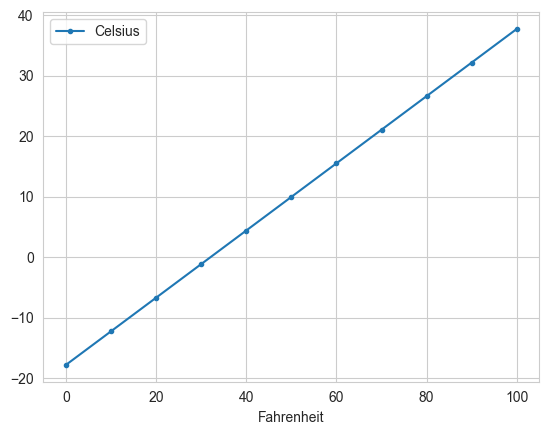

In [129]:
axes = temps_df.plot(x = 'Fahrenheit', y = 'Celsius', style = '.-')

In [130]:
y_label = axes.set_ylabel('Celsius')

In [131]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [132]:
nyc.head()

,Date,Value,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [133]:
nyc.tail()

,Date,Value,Anomaly
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4
123,2018,38.7,1.3


In [134]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [135]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [136]:
nyc.Date.dtype

dtype('int64')

In [137]:
nyc.Date = nyc.Date.floordiv(1)

In [138]:
nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


Since the date was already a year this part of the project is irrelevant 

In [139]:
nyc.Temperature.describe()

count    124.000000
mean      37.595161
std        4.539848
min       26.100000
25%       34.575000
50%       37.600000
75%       40.600000
max       47.600000
Name: Temperature, dtype: float64

In [140]:
linear_regression = stats.linregress(x = nyc.Date, y = nyc.Temperature)

In [141]:
linear_regression.slope

0.014771361132966163

In [142]:
linear_regression.intercept 

8.694993233674289

In [143]:
linear_regression.slope * 2019 + linear_regression.intercept 

38.51837136113297

In [144]:
linear_regression.slope * 1890 + linear_regression.intercept 

36.612865774980335

In [145]:
sns.set_style('whitegrid')

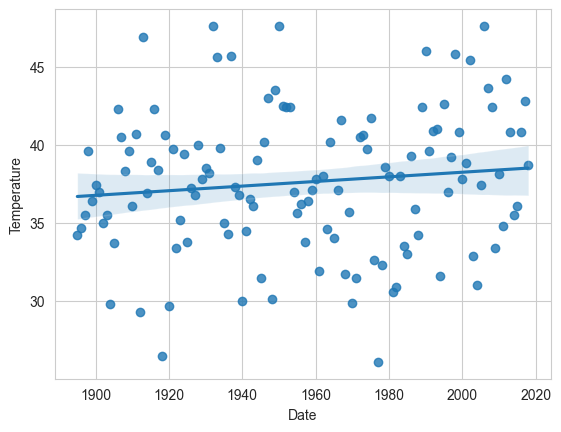

In [146]:
axes = sns.regplot(x = nyc.Date, y = nyc.Temperature)

In [147]:
axes.set_ylim(10, 70)

(10.0, 70.0)